<a href="https://colab.research.google.com/github/JSRV18/Dinosaurio-repository/blob/main/%E7%A7%91%E5%AD%A6%E3%81%AE_%E5%AE%BF%E9%A1%8Cipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
!pip install pint
!pip install pint uncertainties
import uncertainties
from uncertainties import ufloat
import pint as pint
ureg=pint.UnitRegistry(auto_reduce_dimensions=True)
Measurement=ureg.Measurement
Quantity=ureg.Quantity

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.7 MB/s eta 0:00:00


In [ ]:
# a)

prote = Quantity([0, 9.36, 18.72, 28.08, 37.44], 'ug')
asorb = Quantity([0.466, 0.676, 0.883, 1.086, 1.280])
blanco = Quantity(0.466)

Absor = asorb - blanco

Prote = np.array(prote.m)
Absor = np.array(Absor.m)

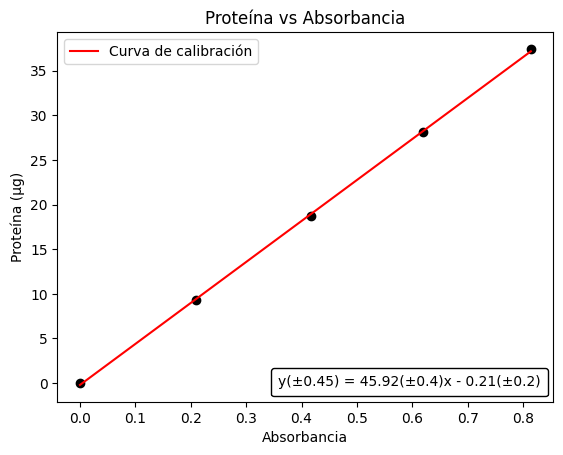

In [ ]:
def Calibracion(x,m,b):
  return m*x +b

from scipy.optimize import curve_fit

popt, pcov = curve_fit(Calibracion, Absor, Prote)

from matplotlib.offsetbox import AnchoredText
plt.scatter(Absor, Prote, c='k')
plt.xlabel('Absorbancia')
plt.ylabel('Proteína (μg)')
plt.title('Proteína vs Absorbancia')
plt.plot(Absor, Calibracion(Absor, *popt), 'r-', label = 'Curva de calibración')

# Creamos el cuadro de texto con la ecuación
ecuacion = f'y(±0.45) = {popt[0]:.2f}(±0.4)x - {abs(popt[1]):.2f}(±0.2)'  # Formato de la ecuación
anchored_text = AnchoredText(ecuacion, loc='lower right', frameon=True)
anchored_text.patch.set_boxstyle("round,pad=0.11,rounding_size=0.2") # Estilo del cuadro
plt.gca().add_artist(anchored_text) # Agregamos el cuadro a la gráfica

plt.legend()
plt.show()

In [ ]:
# b)

m = popt[0]
b = popt[1]

err_m = np.sqrt(pcov[0,0])
err_b = np.sqrt(pcov[1,1])

mU = ufloat(m, err_m) * ureg('ug')
bU = ufloat(b, err_b) * ureg('ug')

sy = np.sqrt(err_m**2 + err_b**2)

round(sy,2), round(mU.n,2), round(bU.n,2), round(err_m,2), round(err_b,2)

(np.float64(0.45), 45.92, -0.21, np.float64(0.4), np.float64(0.2))

In [ ]:
# c)

uknA = Quantity(0.973) - blanco

PuknA = uknA * mU + bU

PuknA

<Quantity(23.0729+/-0.2884, 'microgram')>